In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats

In [2]:
nom_fi_datos = 'G02B_DATOS_DEM_M4.csv'

In [3]:
df_orig = pd.read_csv(nom_fi_datos)

# parseamos la fecha (cadena) para que sea un datetime con formato dd/mm/yyyy 
df_orig.FECHA = pd.to_datetime(df_orig.FECHA, format='%d/%m/%Y') 
s=df_orig.loc[:,'FECHA']
df_orig['DATE'] =  s.dt.date
del df_orig['FECHA']

# añadimos el año-semana para luego poder trabajar cómodamente con el dataframe
ywd=s.dt.isocalendar()
yw = 1000*ywd['year'] + ywd['week'] # por ejemplo 2022032 es la semana 32 del año 2022
df_orig['ANNO-SEMANA'] = yw

print('Tamaño de df_orig con los datos cargados:', df_orig.shape)
print('Dataframe con todos los datos leidos (filas: días, columnas: variables):')
print(df_orig)
df = df_orig

Tamaño de df_orig con los datos cargados: (1627, 33)
Dataframe con todos los datos leidos (filas: días, columnas: variables):
          CR00      CR01      CR02      CR03      CR04      CR05      CR06  \
0     0.039126  0.035324  0.032842  0.031533  0.030857  0.030710  0.030730   
1     0.039032  0.035356  0.032867  0.031417  0.030783  0.030597  0.030657   
2     0.039508  0.035976  0.033711  0.032332  0.031694  0.031551  0.031673   
3     0.040454  0.036701  0.034026  0.032566  0.031944  0.031670  0.031479   
4     0.042847  0.039526  0.036950  0.035158  0.034001  0.033421  0.032762   
...        ...       ...       ...       ...       ...       ...       ...   
1622  0.037500  0.034070  0.031581  0.030255  0.029750  0.030143  0.032196   
1623  0.038127  0.034337  0.031761  0.030471  0.029983  0.030307  0.032492   
1624  0.038088  0.034451  0.031834  0.030294  0.029645  0.029982  0.032268   
1625  0.037944  0.034254  0.031777  0.030190  0.029627  0.029865  0.032261   
1626  0.039021  

APARTADO 3 : ¿Cambia el perfil horario según la festividad? ¿Los perfiles de los laborables son 
parecidos a los de los festivos? ¿Y la variabilidad?


El perfil horario de un día se define cómo el conjunto de de los 24 coeficientes de reparto correspondientes a las 24 horas del día.
Aquí tenemos un ejemplo del perfil horario del 2018-06-30:

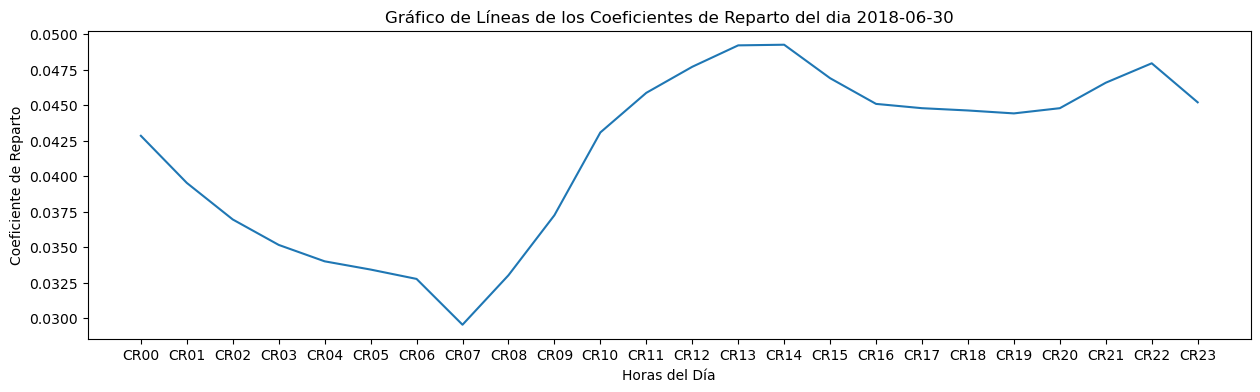

In [4]:
fig = plt.figure(1, figsize=(15, 4)) # permite indicar el nº de la figura y las dimensiones (ancho y alto)
# Selecciona una fila de los datos
fila = df_orig.iloc[4, :24]
# Obtiene los nombres de las columnas
columnas = df.columns[:24]
plt.plot(columnas, fila)

plt.xlabel('Horas del Día')
plt.ylabel('Coeficiente de Reparto')
plt.title(f'Gráfico de Líneas de los Coeficientes de Reparto del dia 2018-06-30')
plt.show()


Primero, vamos a representar todos los perfiles horarios juntos, para ver si se parecen en general.

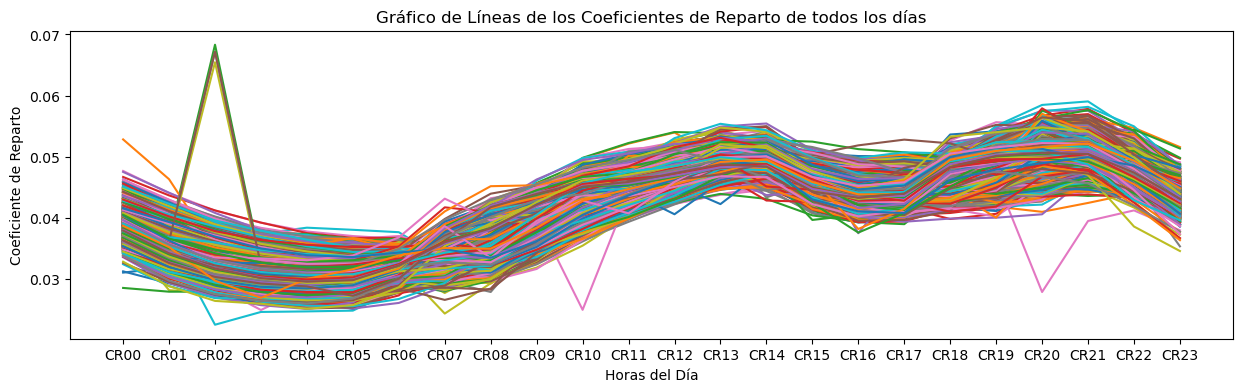

In [5]:

 # Representa las 5 primeras columnas de la fila seleccionada en un gráfico de líneas
fig = plt.figure(1, figsize=(15, 4)) # permite indicar el nº de la figura y las dimensiones (ancho y alto)
for i in range(1626):
    # Selecciona una fila de los datos
    fila = df_orig.iloc[i, :24]
    # Obtiene los nombres de las columnas
    columnas = df.columns[:24]
    plt.plot(columnas, fila)

plt.xlabel('Horas del Día')
plt.ylabel('Coeficiente de Reparto')
plt.title(f'Gráfico de Líneas de los Coeficientes de Reparto de todos los días')
plt.show()


Observamos que hay ciertos valores atípicos, pero más allá de eso son bastante parecidos. 

Ahora representemos solamente los perfiles horarios de los días laborables.

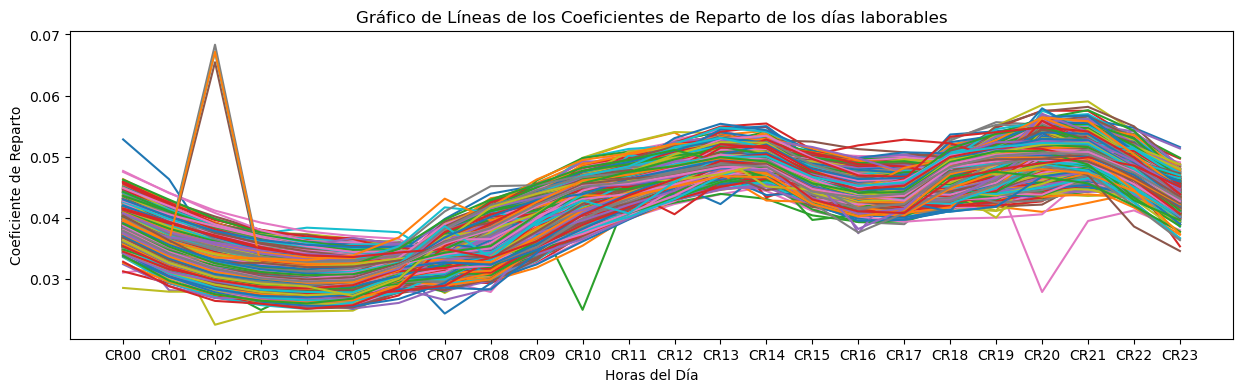

In [6]:
fig = plt.figure(1, figsize=(15, 4)) # permite indicar el nº de la figura y las dimensiones (ancho y alto)
for i in range(1626):
    if df_orig.FESTIVO[i] == 0: #  df_orig.FESTIVO[i] devuelve un 0 o un 1 en función de si el día es festivo o no 
        # Selecciona una fila de los datos
        fila = df_orig.iloc[i, :24]
        # Obtiene los nombres de las columnas
        columnas = df.columns[:24]
        plt.plot(columnas, fila)

plt.xlabel('Horas del Día')
plt.ylabel('Coeficiente de Reparto')
plt.title(f'Gráfico de Líneas de los Coeficientes de Reparto de los días laborables')
plt.show()

La representación es prácticamente igual a la conjunta, tiene sentido ya que hay más laborables que festivos 

Ahora, el de los festivos

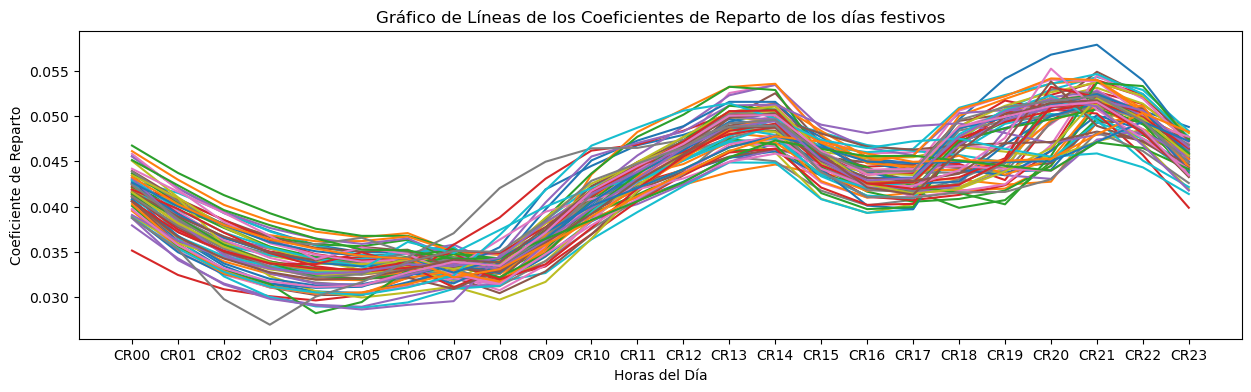

In [7]:

fig = plt.figure(1, figsize=(15, 4)) # permite indicar el nº de la figura y las dimensiones (ancho y alto)
for i in range(1626):
    if df_orig.FESTIVO[i] == 1: #  df_orig.FESTIVO[i] devuelve un 0 o un 1 en función de si el día es festivo o no 
        # Selecciona una fila de los datos
        fila = df_orig.iloc[i, :24]
        # Obtiene los nombres de las columnas
        columnas = df.columns[:24]
        plt.plot(columnas, fila)

plt.xlabel('Horas del Día')
plt.ylabel('Coeficiente de Reparto')
plt.title(f'Gráfico de Líneas de los Coeficientes de Reparto de los días festivos')
plt.show()

Se observa que las gráficas son ligeramente más altas al final del día, pero en general son bastante parecidas a las de los laborables. 


Cabe destacar que hay ciertos días laborables en los que hay un pico de demanda en la hora 2, cosa que en los festivos no pasa en ninguno. Eso da que pensar, no es normal que la demanda eléctrica haya subido varios días a las 2 a.m. ( APUNTE IMPORTANTE: ATIPICO MUY EXTRAÑO )

Como todos los coeficientes suman 1, es inútil considerar la media como medida de tendencia central

In [8]:
fila = sum(df_orig.iloc[0, :24]) # Sumamos los 24 coeficientes del día 0 
print(fila)

0.9999999999999999


Por ello vamos a analizar la demanda mediana en los días festivos y la demanda mediana en los no festivos.

El procedimiento seguido es el siguiente:
1) Obtener la mediana de cada perfil horario
2) Meter cada mediana en una lista
3) Calcular la media de la lista de medianas
4) Comparar la media de la lista de medianas de los días festivos con la de los días no festivos 

In [9]:
lista_medianas = []
for i in range(1626):
    if df_orig.FESTIVO[i] == 1: #  df_orig.FESTIVO[i] devuelve un 0 o un 1 en función de si el día es festivo o no 
        # Selecciona una fila de los datos
        fila = sorted(df_orig.iloc[i, :24])
        md = np.median(fila)  # mediana
        lista_medianas.append(md)

media_de_medianas = np.mean(lista_medianas)
print(f"Mediana días festivos {media_de_medianas}")
        

Mediana días festivos 0.04273707492510042


In [10]:
lista_medianas = []
for i in range(1626):
    if df_orig.FESTIVO[i] == 0: #  df_orig.FESTIVO[i] devuelve un 0 o un 1 en función de si el día es festivo o no 
        # Selecciona una fila de los datos
        fila = sorted(df_orig.iloc[i, :24])
        md = np.median(fila)  # mediana
        lista_medianas.append(md)

media_de_medianas = np.mean(lista_medianas)
print(f"Mediana días no festivos {media_de_medianas }" )

Mediana días no festivos 0.04390421900536474


Se observa que el consumo mediano es prácticamente igual en ambas, por tanto, podemos afirmar que el perfil horario mediano no se ve afectado de manera sustancial en función de la festividad.

Analizemos ahora la variablidad del perfil horario en función de la festividad, para ello nos serviremos del coeficiente de variación, ya que permite comparar variabilidades de forma cómoda. 
El procedimiento es el mismo que en el apartado anterior, pero con el coeficiente de variación en lugar de la mediana. 

In [11]:
lista_cvarianzas = []
for i in range(1626):
    if df_orig.FESTIVO[i] == 1: #  df_orig.FESTIVO[i] devuelve un 0 o un 1 en función de si el día es festivo o no 
        # Selecciona una fila de los datos
        fila = sorted(df_orig.iloc[i, :24])
        va =  stats.variation(fila) # cvarianza
        lista_cvarianzas.append(va)

media_de_cvarianzas = np.mean(lista_cvarianzas)
print(f"Coeficiente de variación días festivos {format(media_de_cvarianzas, '.8f')}")

Coeficiente de variación días festivos 0.15447077


In [12]:
lista_cvarianzas = []
for i in range(1626):
    if df_orig.FESTIVO[i] == 0: #  df_orig.FESTIVO[i] devuelve un 0 o un 1 en función de si el día es festivo o no 
        # Selecciona una fila de los datos
        fila = sorted(df_orig.iloc[i, :24])
        va =  stats.variation(fila) # cvarianza
        lista_cvarianzas.append(va)

media_de_cvarianzas = np.mean(lista_cvarianzas)
print(f"Coeficiente de variación días no festivos {format(media_de_cvarianzas, '.8f')}")

Coeficiente de variación días no festivos 0.17496393


La variabilidad en los días no festivos es ligeramente mayor, aunque la diferencia es prácticamente despreciable. Por tanto la variablidad del perfil horario no está sujeta de manera sustancial a la festividad. 

APARTADO 2: Definir dos métricas para caracterizar los perfiles: una medida de la tendencia 
central del perfil y una medida de la dispersión del perfil. ¿Estas métricas 
cambian con el día de la semana? ¿Y con el mes?

Con respecto al día de la semana:


Como medida de tendencia central tomaremos la mediana, ya que, como se ha explicado antes, la media en este caso no aporta ningún valor.
Como medida de dispersión tomaremos el coeficiente de variación, ya que es muy cómodo de interpretar 
Procedimiento:
1) Calculamos la mediana y el coeficiente de variación de cada uno de los coeficientes de reparto en función del día
2) Calculamos las medias de las listas de coeficientes y de la lista de medianas
4) Las comparamos entre sí

In [13]:
lista = [[[],[]],[[],[]],[[],[]],[[],[]],[[],[]],[[],[]],[[],[]]]
for i in range(1626):
    if df_orig.DIASEM[i] == 1:
        fila = sorted(df_orig.iloc[i, :24])
        md = np.median(fila)
        cvar =  stats.variation(fila) # cvarianza
        lista[0][0].append(md)
        lista[0][1].append(cvar)
    elif df_orig.DIASEM[i] == 2:
        fila = sorted(df_orig.iloc[i, :24])
        md = np.median(fila)
        cvar =  stats.variation(fila) # cvarianza
        lista[1][0].append(md)
        lista[1][1].append(cvar)
    elif df_orig.DIASEM[i] == 3:
        fila = sorted(df_orig.iloc[i, :24])
        md = np.median(fila)
        cvar =  stats.variation(fila) # cvarianza
        lista[2][0].append(md)
        lista[2][1].append(cvar)
    elif df_orig.DIASEM[i] == 4:
        fila = sorted(df_orig.iloc[i, :24])
        md = np.median(fila)
        cvar =  stats.variation(fila) # cvarianza
        lista[3][0].append(md)
        lista[3][1].append(cvar)
    elif df_orig.DIASEM[i] == 5:
        fila = sorted(df_orig.iloc[i, :24])
        md = np.median(fila)
        cvar =  stats.variation(fila) # cvarianza
        lista[4][0].append(md)
        lista[4][1].append(cvar)
    elif df_orig.DIASEM[i] == 6:
        fila = sorted(df_orig.iloc[i, :24])
        md = np.median(fila)
        cvar =  stats.variation(fila) # cvarianza
        lista[5][0].append(md)
        lista[5][1].append(cvar)
    elif df_orig.DIASEM[i] == 7:
        fila = sorted(df_orig.iloc[i, :24])
        md = np.median(fila)
        cvar =  stats.variation(fila) # cvarianza
        lista[6][0].append(md)
        lista[6][1].append(cvar)
 
for i in range(7):
    print(f"Día {i+1}: mediana = {np.mean(lista[i][0])} cvar = {np.mean(lista[i][1])}")

Día 1: mediana = 0.044155530683335546 cvar = 0.18170449810956682
Día 2: mediana = 0.04405357268371962 cvar = 0.17919907903466029
Día 3: mediana = 0.04400641316934008 cvar = 0.17879336993473208
Día 4: mediana = 0.044148561889710045 cvar = 0.17992326119495475
Día 5: mediana = 0.04399890073233104 cvar = 0.17447425703061348
Día 6: mediana = 0.043709018681680624 cvar = 0.16381067263342017
Día 7: mediana = 0.042890611010911205 cvar = 0.16039410220342556


Observamos que cambian muy ligeramente con el día de la semana.
La demanda mediana es ligeramente menor los fines de semana, además la variablidad es un poco menor en ese par de días.
Más allá de eso, se observa un poco más de variablidad el lunes. 



Con respecto al mes:
Tomaremos las mismas medidas y repetiremos el proceso

In [14]:
lista = [[[],[]],[[],[]],[[],[]],[[],[]],[[],[]],[[],[]],[[],[]],[[],[]],[[],[]],[[],[]],[[],[]],[[],[]]]

for i in range(1626):
    if df_orig.MES[i] == 1:
        fila = sorted(df_orig.iloc[i, :24])
        md = np.median(fila)
        cvar =  stats.variation(fila) # cvarianza
        lista[0][0].append(md)
        lista[0][1].append(cvar)
    elif df_orig.MES[i] == 2:
        fila = sorted(df_orig.iloc[i, :24])
        md = np.median(fila)
        cvar =  stats.variation(fila) # cvarianza
        lista[1][0].append(md)
        lista[1][1].append(cvar)
    elif df_orig.MES[i] == 3:
        fila = sorted(df_orig.iloc[i, :24])
        md = np.median(fila)
        cvar =  stats.variation(fila) # cvarianza
        lista[2][0].append(md)
        lista[2][1].append(cvar)
    elif df_orig.MES[i] == 4:
        fila = sorted(df_orig.iloc[i, :24])
        md = np.median(fila)
        cvar =  stats.variation(fila) # cvarianza
        lista[3][0].append(md)
        lista[3][1].append(cvar)
    elif df_orig.MES[i] == 5:
        fila = sorted(df_orig.iloc[i, :24])
        md = np.median(fila)
        cvar =  stats.variation(fila) # cvarianza
        lista[4][0].append(md)
        lista[4][1].append(cvar)
    elif df_orig.MES[i] == 6:
        fila = sorted(df_orig.iloc[i, :24])
        md = np.median(fila)
        cvar =  stats.variation(fila) # cvarianza
        lista[5][0].append(md)
        lista[5][1].append(cvar)
    elif df_orig.MES[i] == 7:
        fila = sorted(df_orig.iloc[i, :24])
        md = np.median(fila)
        cvar =  stats.variation(fila) # cvarianza
        lista[6][0].append(md)
        lista[6][1].append(cvar)
    elif df_orig.MES[i] == 8:
        fila = sorted(df_orig.iloc[i, :24])
        md = np.median(fila)
        cvar =  stats.variation(fila) # cvarianza
        lista[7][0].append(md)
        lista[7][1].append(cvar)
    elif df_orig.MES[i] == 9:
        fila = sorted(df_orig.iloc[i, :24])
        md = np.median(fila)
        cvar =  stats.variation(fila) # cvarianza
        lista[8][0].append(md)
        lista[8][1].append(cvar)
    elif df_orig.MES[i] == 10:
        fila = sorted(df_orig.iloc[i, :24])
        md = np.median(fila)
        cvar =  stats.variation(fila) # cvarianza
        lista[9][0].append(md)
        lista[9][1].append(cvar)
    elif df_orig.MES[i] == 11:
        fila = sorted(df_orig.iloc[i, :24])
        md = np.median(fila)
        cvar =  stats.variation(fila) # cvarianza
        lista[10][0].append(md)
        lista[10][1].append(cvar)
    elif df_orig.MES[i] == 12:
        fila = sorted(df_orig.iloc[i, :24])
        md = np.median(fila)
        cvar =  stats.variation(fila) # cvarianza
        lista[11][0].append(md)
        lista[11][1].append(cvar)
 



for i in range(12):
    print(f"Mes {i+1}: mediana = {np.mean(lista[i][0])} cvar = {np.mean(lista[i][1])}")

Mes 1: mediana = 0.04369628943587697 cvar = 0.19696773782793522
Mes 2: mediana = 0.04338703385395057 cvar = 0.18546952087189766
Mes 3: mediana = 0.04336636135207915 cvar = 0.18501113513393505
Mes 4: mediana = 0.04310656042289507 cvar = 0.16548772132403733
Mes 5: mediana = 0.04362223103961357 cvar = 0.15597465853553372
Mes 6: mediana = 0.04464107652537773 cvar = 0.16576626562061317
Mes 7: mediana = 0.044716861999671446 cvar = 0.1675775921222339
Mes 8: mediana = 0.04441536813173308 cvar = 0.1648425941801571
Mes 9: mediana = 0.04446841313114501 cvar = 0.17186389776161212
Mes 10: mediana = 0.04375349090689806 cvar = 0.17206520875599066
Mes 11: mediana = 0.04320170391770706 cvar = 0.17812628978698924
Mes 12: mediana = 0.043509253488797785 cvar = 0.18270594389005887


Las medianas no cambian mucho respecto al mes. La variablidad cambia un poco más que  respecto al día de la semana o la festividad, sin embargo no es un cambio muy considerable

**** SACAR LOS COEFICIENTES MEDIOS DE REPARTO DE CADA HORA Y COMPARAR***

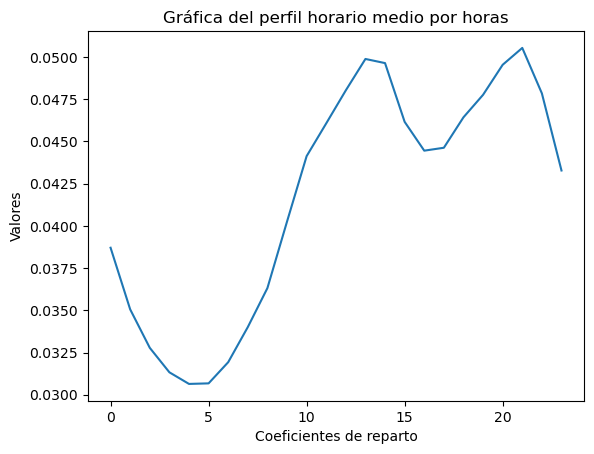

mediana(Coeficientes medios): 0.04428735050264973


In [34]:
lista_medias = []
lista_00 = []
lista_01 = []
lista_02 = []
lista_03 = []
lista_04 = []
lista_05 = []
lista_06 = []
lista_07 = []
lista_08 = []
lista_09 = []
lista_10 = []
lista_11 = []
lista_12 = []
lista_13 = []
lista_14 = []
lista_15 = []
lista_16 = []
lista_17 = []
lista_18 = []
lista_19 = []
lista_20 = []
lista_21 = []
lista_22 = []
lista_23 = []
for i in range(1626):
    lista_00.append(df_orig.CR00[i])
    lista_01.append(df_orig.CR01[i])
    lista_02.append(df_orig.CR02[i])
    lista_03.append(df_orig.CR03[i])
    lista_04.append(df_orig.CR04[i])
    lista_05.append(df_orig.CR05[i])
    lista_06.append(df_orig.CR06[i])
    lista_07.append(df_orig.CR07[i])
    lista_08.append(df_orig.CR08[i])
    lista_09.append(df_orig.CR09[i])
    lista_10.append(df_orig.CR10[i])
    lista_11.append(df_orig.CR11[i])
    lista_12.append(df_orig.CR12[i])
    lista_13.append(df_orig.CR13[i])
    lista_14.append(df_orig.CR14[i])
    lista_15.append(df_orig.CR15[i])
    lista_16.append(df_orig.CR16[i])
    lista_17.append(df_orig.CR17[i])
    lista_18.append(df_orig.CR18[i])
    lista_19.append(df_orig.CR19[i])
    lista_20.append(df_orig.CR20[i])
    lista_21.append(df_orig.CR21[i])
    lista_22.append(df_orig.CR22[i])
    lista_23.append(df_orig.CR23[i])

lista_medias.append(np.mean(lista_00))
lista_medias.append(np.mean(lista_01))
lista_medias.append(np.mean(lista_02))
lista_medias.append(np.mean(lista_03))
lista_medias.append(np.mean(lista_04))
lista_medias.append(np.mean(lista_05))
lista_medias.append(np.mean(lista_06))
lista_medias.append(np.mean(lista_07))
lista_medias.append(np.mean(lista_08))
lista_medias.append(np.mean(lista_09))
lista_medias.append(np.mean(lista_10))
lista_medias.append(np.mean(lista_11))
lista_medias.append(np.mean(lista_12))
lista_medias.append(np.mean(lista_13))
lista_medias.append(np.mean(lista_14))
lista_medias.append(np.mean(lista_15))
lista_medias.append(np.mean(lista_16))
lista_medias.append(np.mean(lista_17))
lista_medias.append(np.mean(lista_18))
lista_medias.append(np.mean(lista_19))
lista_medias.append(np.mean(lista_20))
lista_medias.append(np.mean(lista_21))
lista_medias.append(np.mean(lista_22))
lista_medias.append(np.mean(lista_23))



x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
y = lista_medias

plt.plot(x, y)
plt.xlabel('Coeficientes de reparto')
plt.ylabel('Valores')
plt.title('Gráfica del perfil horario medio por horas')
plt.show()


md = np.median(lista_medias)  # mediana


print('mediana(Coeficientes medios):', md)

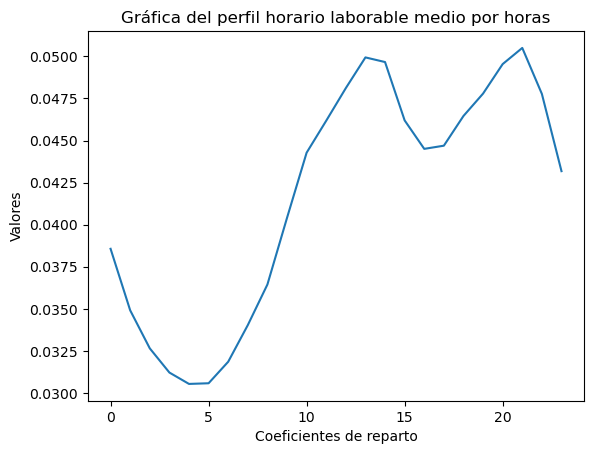

mediana(Coeficientes medios laborable): 0.04439004387350859


In [35]:
lista_medias = []
lista_00 = []
lista_01 = []
lista_02 = []
lista_03 = []
lista_04 = []
lista_05 = []
lista_06 = []
lista_07 = []
lista_08 = []
lista_09 = []
lista_10 = []
lista_11 = []
lista_12 = []
lista_13 = []
lista_14 = []
lista_15 = []
lista_16 = []
lista_17 = []
lista_18 = []
lista_19 = []
lista_20 = []
lista_21 = []
lista_22 = []
lista_23 = []
for i in range(1626):
    if df_orig.FESTIVO[i] == 0:
        lista_00.append(df_orig.CR00[i])
        lista_01.append(df_orig.CR01[i])
        lista_02.append(df_orig.CR02[i])
        lista_03.append(df_orig.CR03[i])
        lista_04.append(df_orig.CR04[i])
        lista_05.append(df_orig.CR05[i])
        lista_06.append(df_orig.CR06[i])
        lista_07.append(df_orig.CR07[i])
        lista_08.append(df_orig.CR08[i])
        lista_09.append(df_orig.CR09[i])
        lista_10.append(df_orig.CR10[i])
        lista_11.append(df_orig.CR11[i])
        lista_12.append(df_orig.CR12[i])
        lista_13.append(df_orig.CR13[i])
        lista_14.append(df_orig.CR14[i])
        lista_15.append(df_orig.CR15[i])
        lista_16.append(df_orig.CR16[i])
        lista_17.append(df_orig.CR17[i])
        lista_18.append(df_orig.CR18[i])
        lista_19.append(df_orig.CR19[i])
        lista_20.append(df_orig.CR20[i])
        lista_21.append(df_orig.CR21[i])
        lista_22.append(df_orig.CR22[i])
        lista_23.append(df_orig.CR23[i])

lista_medias.append(np.mean(lista_00))
lista_medias.append(np.mean(lista_01))
lista_medias.append(np.mean(lista_02))
lista_medias.append(np.mean(lista_03))
lista_medias.append(np.mean(lista_04))
lista_medias.append(np.mean(lista_05))
lista_medias.append(np.mean(lista_06))
lista_medias.append(np.mean(lista_07))
lista_medias.append(np.mean(lista_08))
lista_medias.append(np.mean(lista_09))
lista_medias.append(np.mean(lista_10))
lista_medias.append(np.mean(lista_11))
lista_medias.append(np.mean(lista_12))
lista_medias.append(np.mean(lista_13))
lista_medias.append(np.mean(lista_14))
lista_medias.append(np.mean(lista_15))
lista_medias.append(np.mean(lista_16))
lista_medias.append(np.mean(lista_17))
lista_medias.append(np.mean(lista_18))
lista_medias.append(np.mean(lista_19))
lista_medias.append(np.mean(lista_20))
lista_medias.append(np.mean(lista_21))
lista_medias.append(np.mean(lista_22))
lista_medias.append(np.mean(lista_23))

x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
y = lista_medias

plt.plot(x, y)
plt.xlabel('Coeficientes de reparto')
plt.ylabel('Valores')
plt.title('Gráfica del perfil horario laborable medio por horas')
plt.show()

md = np.median(lista_medias)  # mediana


print('mediana(Coeficientes medios laborable):', md)

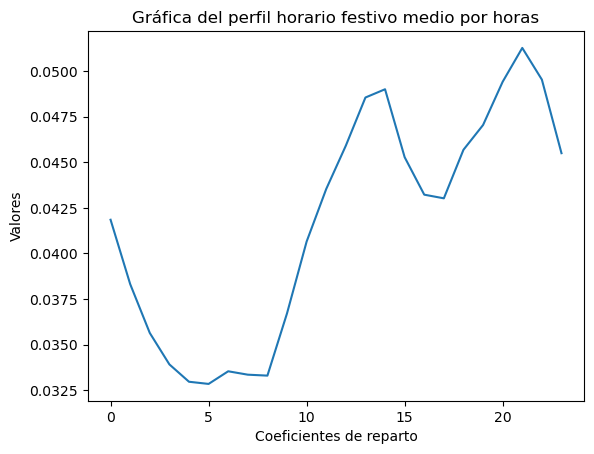

mediana(Coeficientes medios festivo): 0.04311918539652013


In [36]:
lista_medias = []
lista_00 = []
lista_01 = []
lista_02 = []
lista_03 = []
lista_04 = []
lista_05 = []
lista_06 = []
lista_07 = []
lista_08 = []
lista_09 = []
lista_10 = []
lista_11 = []
lista_12 = []
lista_13 = []
lista_14 = []
lista_15 = []
lista_16 = []
lista_17 = []
lista_18 = []
lista_19 = []
lista_20 = []
lista_21 = []
lista_22 = []
lista_23 = []
for i in range(1626):
    if df_orig.FESTIVO[i] == 1:
        lista_00.append(df_orig.CR00[i])
        lista_01.append(df_orig.CR01[i])
        lista_02.append(df_orig.CR02[i])
        lista_03.append(df_orig.CR03[i])
        lista_04.append(df_orig.CR04[i])
        lista_05.append(df_orig.CR05[i])
        lista_06.append(df_orig.CR06[i])
        lista_07.append(df_orig.CR07[i])
        lista_08.append(df_orig.CR08[i])
        lista_09.append(df_orig.CR09[i])
        lista_10.append(df_orig.CR10[i])
        lista_11.append(df_orig.CR11[i])
        lista_12.append(df_orig.CR12[i])
        lista_13.append(df_orig.CR13[i])
        lista_14.append(df_orig.CR14[i])
        lista_15.append(df_orig.CR15[i])
        lista_16.append(df_orig.CR16[i])
        lista_17.append(df_orig.CR17[i])
        lista_18.append(df_orig.CR18[i])
        lista_19.append(df_orig.CR19[i])
        lista_20.append(df_orig.CR20[i])
        lista_21.append(df_orig.CR21[i])
        lista_22.append(df_orig.CR22[i])
        lista_23.append(df_orig.CR23[i])

lista_medias.append(np.mean(lista_00))
lista_medias.append(np.mean(lista_01))
lista_medias.append(np.mean(lista_02))
lista_medias.append(np.mean(lista_03))
lista_medias.append(np.mean(lista_04))
lista_medias.append(np.mean(lista_05))
lista_medias.append(np.mean(lista_06))
lista_medias.append(np.mean(lista_07))
lista_medias.append(np.mean(lista_08))
lista_medias.append(np.mean(lista_09))
lista_medias.append(np.mean(lista_10))
lista_medias.append(np.mean(lista_11))
lista_medias.append(np.mean(lista_12))
lista_medias.append(np.mean(lista_13))
lista_medias.append(np.mean(lista_14))
lista_medias.append(np.mean(lista_15))
lista_medias.append(np.mean(lista_16))
lista_medias.append(np.mean(lista_17))
lista_medias.append(np.mean(lista_18))
lista_medias.append(np.mean(lista_19))
lista_medias.append(np.mean(lista_20))
lista_medias.append(np.mean(lista_21))
lista_medias.append(np.mean(lista_22))
lista_medias.append(np.mean(lista_23))

x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
y = lista_medias

plt.plot(x, y)
plt.xlabel('Coeficientes de reparto')
plt.ylabel('Valores')
plt.title('Gráfica del perfil horario festivo medio por horas')
plt.show()

md = np.median(lista_medias)  # mediana


print('mediana(Coeficientes medios festivo):', md)